In [1]:
import sys
import os
import numpy as np
from pathlib import Path
from scipy.stats import pearsonr
root = Path(os.getcwd()).parent.parent
sys.path.append(str(Path(os.getcwd()).parent))
np.set_printoptions(threshold=sys.maxsize, suppress=True)

In [2]:
from constant import FeatureType
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import argparse
import hashlib
import math

In [3]:
# set korean for matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## Settings

In [4]:
parser = argparse.ArgumentParser()
args = parser.parse_args("")

# ====== Model ====== #
args.frame_in = 72
args.frame_out = 24


# ====== Data ====== #
args.years = [2017, 2018, 2019]
args.region = "Jindo"
args.station = 192

# ====== Features ====== #
features = [FeatureType.SUNSHINE,
            FeatureType.GROUND_TEMPERATURE,
            FeatureType.HUMIDITY,
            FeatureType.WIND_SPEED,
            FeatureType.WIND_DIRECTION,
            FeatureType.TEMPERATURE,
            FeatureType.VISIBILITY,
            FeatureType.PRECIPITATION,
            FeatureType.STEAM_PRESSURE,
            FeatureType.DEW_POINT_TEMPERATURE,
            FeatureType.ATMOSPHERIC_PRESSURE]

## Results

In [5]:
result_path = os.path.join(root, 'results', '4th trial.csv')
result_df = pd.read_csv(result_path, encoding='euc-kr')
result_df = result_df.set_index('time')
result_df

,1th model,2th model,3th model,4th model,5th model,6th model,7th model,8th model,9th model,10th model,11th model,y_test
time,,,,,,,,,,,,
2019-05-30 00:00:00,0.234197,-3.368773,-2.302956,12.233020,3.104604,-2.382244,2.448870,2.468352,-4.068299,-2.434537,-0.289093,0.0
2019-05-30 01:00:00,0.016860,-1.766207,-3.953760,9.128450,1.593559,-2.054074,-0.014417,3.078313,-6.053586,-4.361951,-1.192151,0.0
2019-05-30 02:00:00,-0.758040,-2.601658,-3.021941,12.175908,0.023484,-2.462082,-2.466656,0.834385,-7.495699,-9.542589,-2.251395,0.0
2019-05-30 03:00:00,1.185999,0.894232,-5.386099,19.680574,-1.704584,-2.918447,-0.045782,4.366291,-8.206658,-9.985145,-1.701431,0.0
2019-05-30 04:00:00,9.462348,10.320386,-0.901392,45.930130,3.215022,1.374590,4.831807,13.780279,-5.071716,-7.882029,5.026722,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,-1.466329,-1.972112,-6.805889,9.452386,0.649125,5.376867,2.610172,5.759491,-4.521510,0.501733,-3.379946,0.0
2019-12-31 20:00:00,2.183158,-2.220931,-4.317931,6.697513,4.351789,4.038692,4.915739,4.087399,-3.649524,5.753185,-2.444051,0.0
2019-12-31 21:00:00,1.292134,-2.667343,-2.414737,10.019226,4.996587,3.695299,9.371806,6.926704,-2.649773,8.105394,-1.266127,0.0


### NRMSE

In [6]:
nrmse_list = []

for i in range(len(features)):
    col_name = '%dth model' % (i + 1)
    y_pred = result_df[col_name]
    y_test = result_df['y_test']

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    max_min = np.max(y_test) - np.min(y_test)
    nrmse = rmse / max_min
    nrmse_list.append(nrmse)

    print(col_name)
    print('rmse:', rmse)
    print('nrmse:', nrmse)
    print()

1th model
rmse: 34.34775335680264
nrmse: 0.11151867972987871

2th model
rmse: 35.447757314887525
nrmse: 0.11509012115223223

3th model
rmse: 35.85572133886143
nrmse: 0.11641467967162801

4th model
rmse: 39.72309757474065
nrmse: 0.12897109602188522

5th model
rmse: 43.056951337585296
nrmse: 0.1397952965506016

6th model
rmse: 42.623063952171876
nrmse: 0.1383865712732853

7th model
rmse: 36.143665590918246
nrmse: 0.11734956360687743

8th model
rmse: 38.29868006172907
nrmse: 0.1243463638367827

9th model
rmse: 36.129836856667005
nrmse: 0.11730466511904872

10th model
rmse: 41.41522658714852
nrmse: 0.13446502138684582

11th model
rmse: 33.570767325291
nrmse: 0.10899599780938637



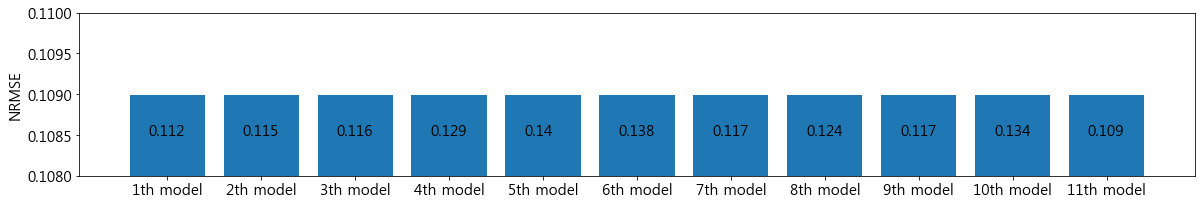

In [30]:
fig, ax= plt.subplots(1, 1, figsize=(20, 3))
plt.rcParams.update({'font.size': 15})
ax.bar(['%dth model' % (i + 1) for i in range(11)], nrmse)
for index, value in enumerate(nrmse_list):
    ax.text(index - 0.2, 0.1085, str(round(value, 3)))
plt.ylabel('NRMSE')
plt.ylim(0.1080, 0.11)
plt.show()

## Value

In [8]:
result_df.index = pd.to_datetime(result_df.index, format = '%Y-%m-%d %H:%M:%S').strftime('%m/%d %H:%M')
result_df

,1th model,2th model,3th model,4th model,5th model,6th model,7th model,8th model,9th model,10th model,11th model,y_test
05/30 00:00,0.234197,-3.368773,-2.302956,12.233020,3.104604,-2.382244,2.448870,2.468352,-4.068299,-2.434537,-0.289093,0.0
05/30 01:00,0.016860,-1.766207,-3.953760,9.128450,1.593559,-2.054074,-0.014417,3.078313,-6.053586,-4.361951,-1.192151,0.0
05/30 02:00,-0.758040,-2.601658,-3.021941,12.175908,0.023484,-2.462082,-2.466656,0.834385,-7.495699,-9.542589,-2.251395,0.0
05/30 03:00,1.185999,0.894232,-5.386099,19.680574,-1.704584,-2.918447,-0.045782,4.366291,-8.206658,-9.985145,-1.701431,0.0
05/30 04:00,9.462348,10.320386,-0.901392,45.930130,3.215022,1.374590,4.831807,13.780279,-5.071716,-7.882029,5.026722,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12/31 19:00,-1.466329,-1.972112,-6.805889,9.452386,0.649125,5.376867,2.610172,5.759491,-4.521510,0.501733,-3.379946,0.0
12/31 20:00,2.183158,-2.220931,-4.317931,6.697513,4.351789,4.038692,4.915739,4.087399,-3.649524,5.753185,-2.444051,0.0
12/31 21:00,1.292134,-2.667343,-2.414737,10.019226,4.996587,3.695299,9.371806,6.926704,-2.649773,8.105394,-1.266127,0.0
12/31 22:00,1.629111,-3.976343,-3.667717,12.724298,4.070178,3.460018,2.625054,10.895387,-4.957782,2.476855,-0.621017,0.0


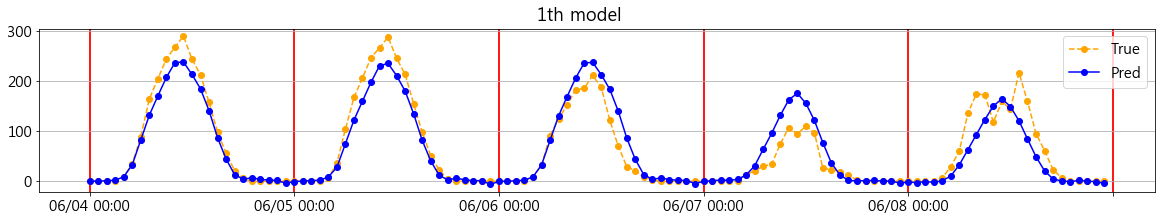

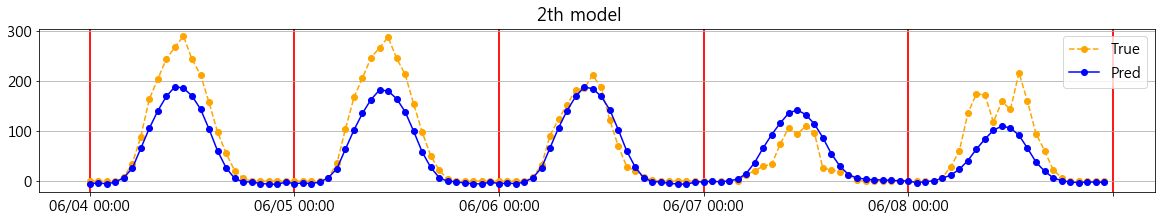

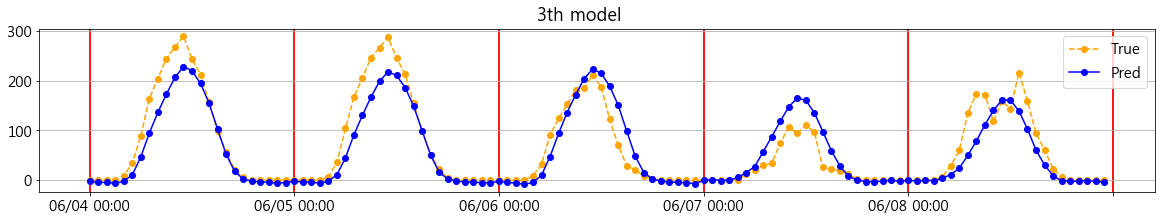

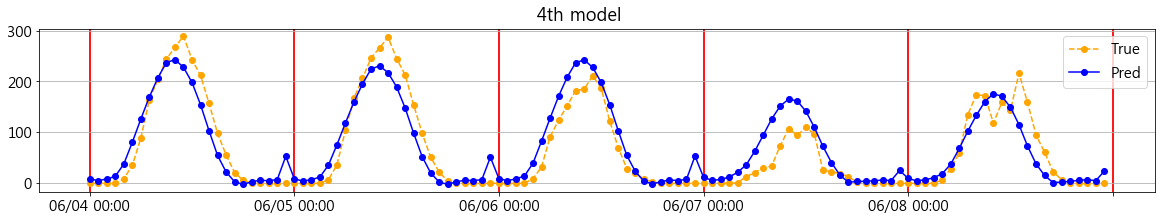

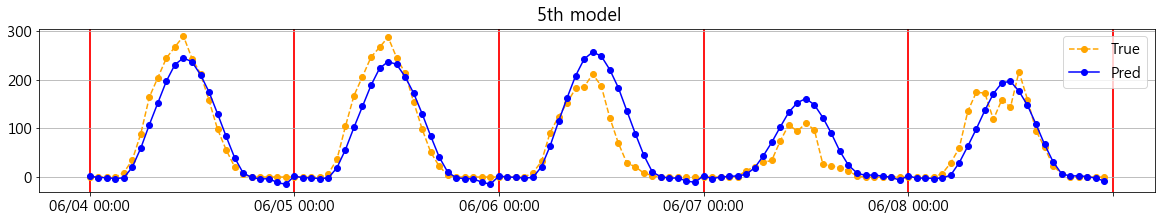

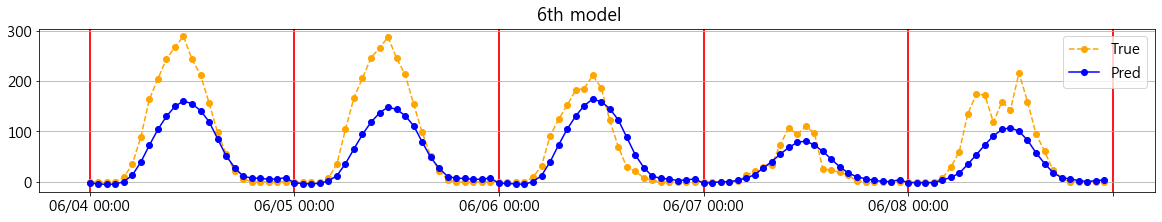

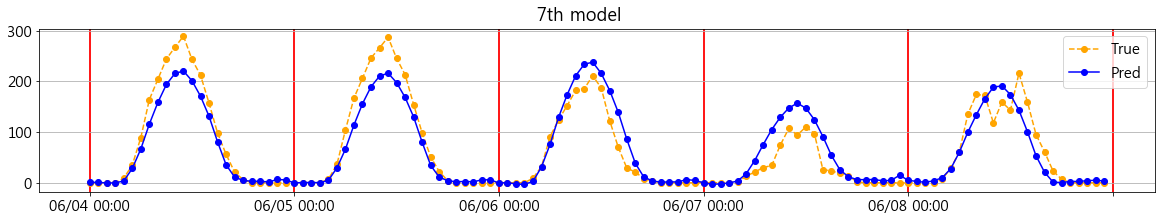

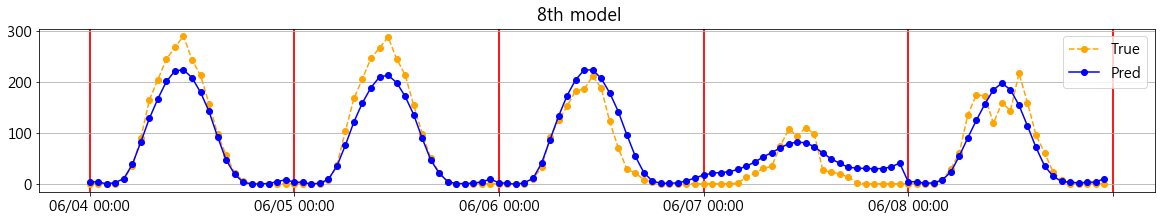

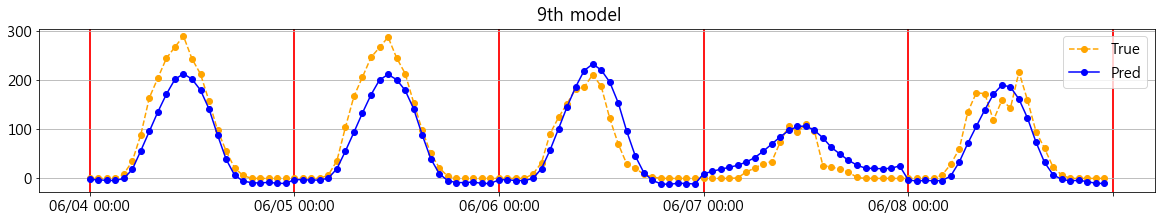

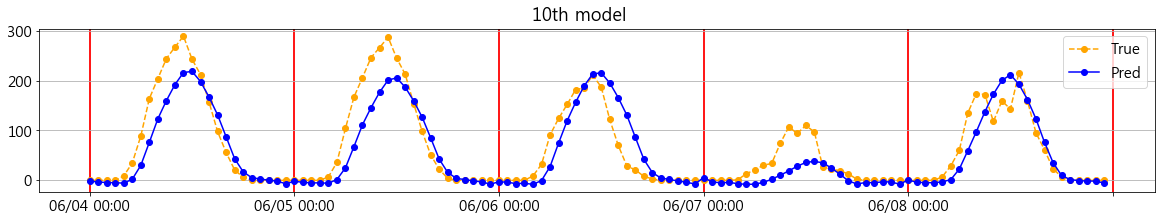

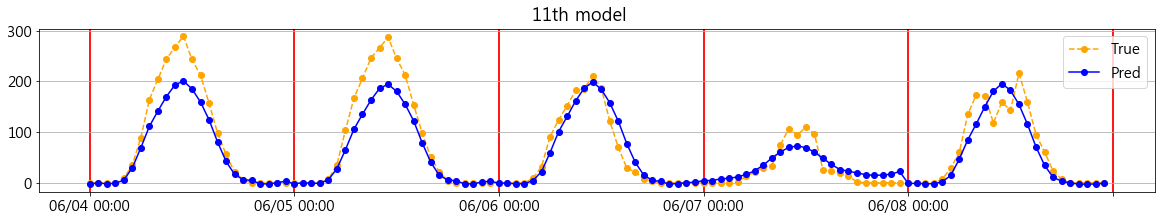

In [31]:
for i in range(len(features)):
    y_pred = result_df['%dth model' % (i + 1)][120:240]
    y_test = result_df['y_test'][120:240]

    fig = plt.figure(figsize=(20,3))
    ax = fig.add_subplot(1,1,1)

    plt.plot(y_test,marker='o',ls='--',c='orange', label = 'True')
    ax.plot(y_pred, 'bo-', label = 'Pred')
    ax.legend()

    x_ticks = np.arange(0, len(y_pred) + 1, 24)   
    ax.set_xticks(x_ticks)
    ax.grid(which='both')
    ax.grid(which='major', alpha=1.0, linewidth=1.8, color='r', axis='x')
    plt.suptitle('%dth model' % (i + 1))
    plt.show()